In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## Loading the Data into DataFrames

In [4]:
# Load the CSV files into DataFrames
athlete_bio_df = pd.read_csv('https://raw.githubusercontent.com/josephwccheng/olympedia_web_scraping/main/data/Olympic_Athlete_Bio.csv')
event_results_df = pd.read_csv('https://raw.githubusercontent.com/josephwccheng/olympedia_web_scraping/main/data/Olympic_Athlete_Event_Results.csv')


## Data Preprocessing
### Calculate Age:
#### Convert the born column in athlete_bio_df to a datetime format and calculate the age of the athletes at the time of the event.

In [5]:
# Convert 'born' column to datetime
athlete_bio_df['born'] = pd.to_datetime(athlete_bio_df['born'], errors='coerce')

# Drop rows where 'born' could not be converted to a datetime
athlete_bio_df.dropna(subset=['born'], inplace=True)

# Merge the two DataFrames on 'athlete_id'
merged_df = pd.merge(event_results_df, athlete_bio_df[['athlete_id', 'born']], on='athlete_id')

# Extract the year from the 'edition' column and convert to datetime format
merged_df['year'] = merged_df['edition'].str.extract(r'(\d{4})').astype(int)

# Calculate the age of the athlete at the time of the event
merged_df['age_at_event'] = merged_df['year'] - merged_df['born'].dt.year


## Handle Missing Data
### Drop rows with missing or invalid ages.

In [6]:
# Drop rows where 'age_at_event' is NaN or less than 0
merged_df = merged_df[(merged_df['age_at_event'].notnull()) & (merged_df['age_at_event'] > 0)]


## Analyze Age Trends Over Time
### 1. Age Distribution Over the Years

C:\Users\aristah\AppData\Local\Temp\ipykernel_5016\3216919950.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df, x='year', y='age_at_event', ci=None)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


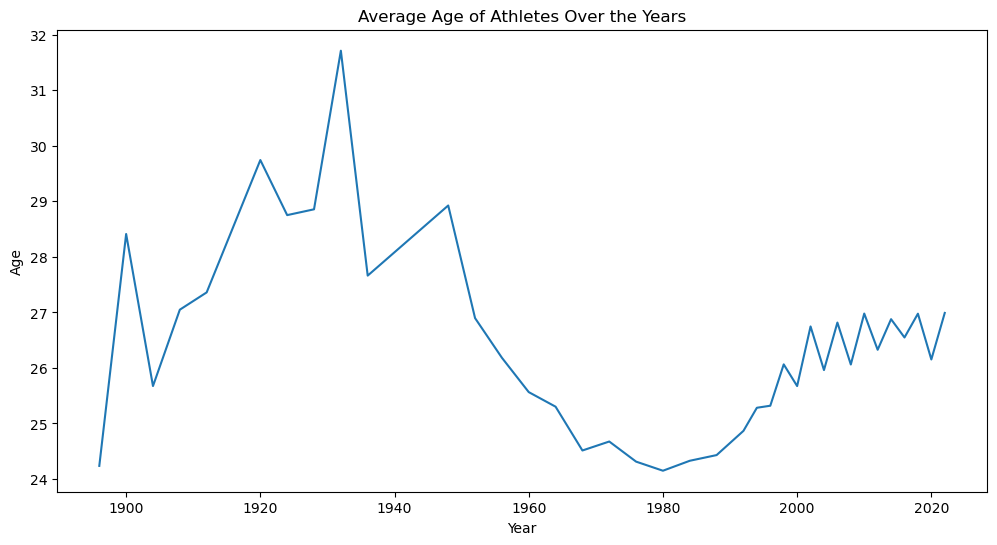

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='age_at_event', ci=None)
plt.title('Average Age of Athletes Over the Years')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()


### 2. Age Distribution by Event Type

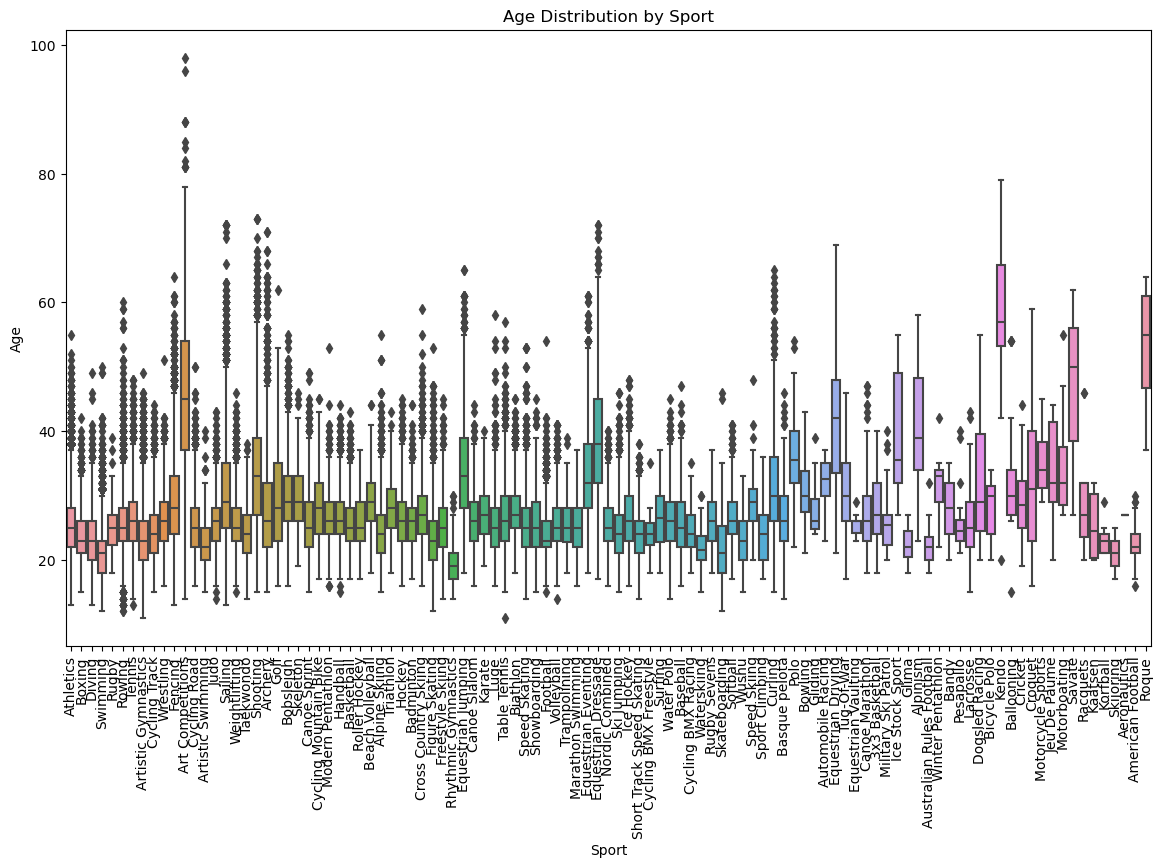

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df, x='sport', y='age_at_event')
plt.title('Age Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


## Age as a Factor in Different Events
### Average Age by Sport

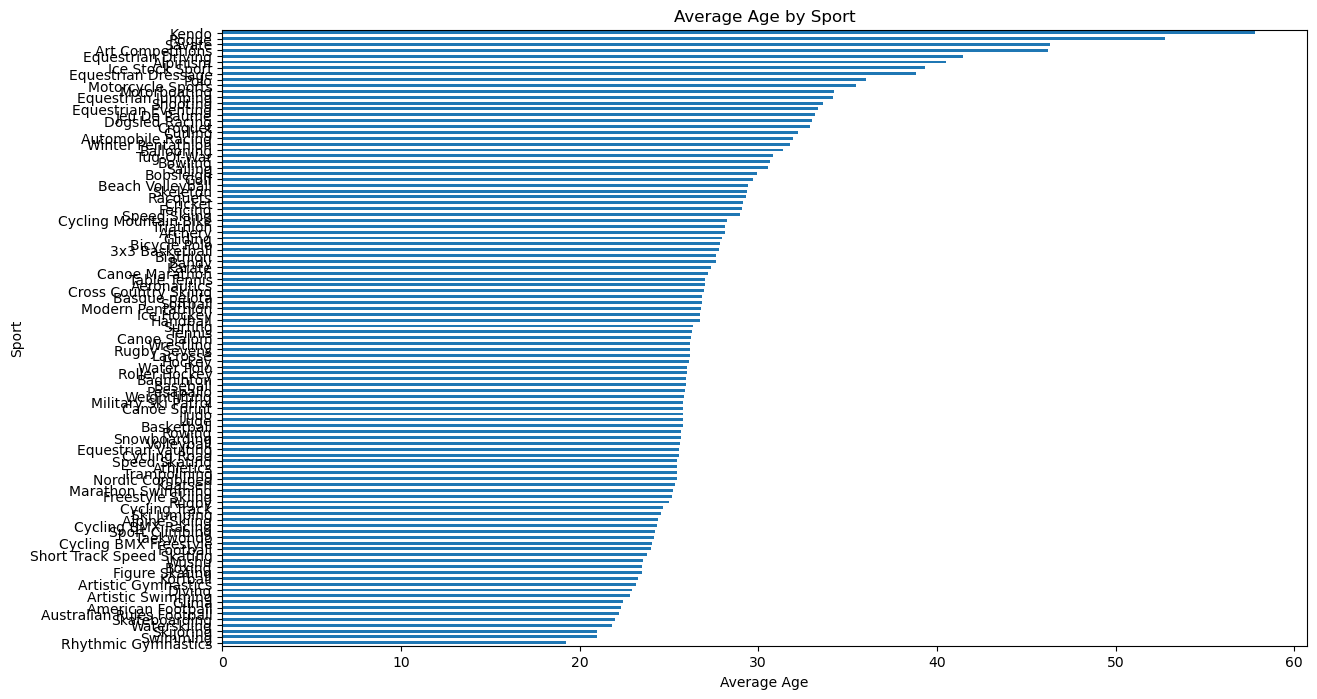

In [9]:
avg_age_by_sport = merged_df.groupby('sport')['age_at_event'].mean().sort_values()

plt.figure(figsize=(14, 8))
avg_age_by_sport.plot(kind='barh')
plt.title('Average Age by Sport')
plt.xlabel('Average Age')
plt.ylabel('Sport')
plt.show()


### Age Distribution for Specific Events

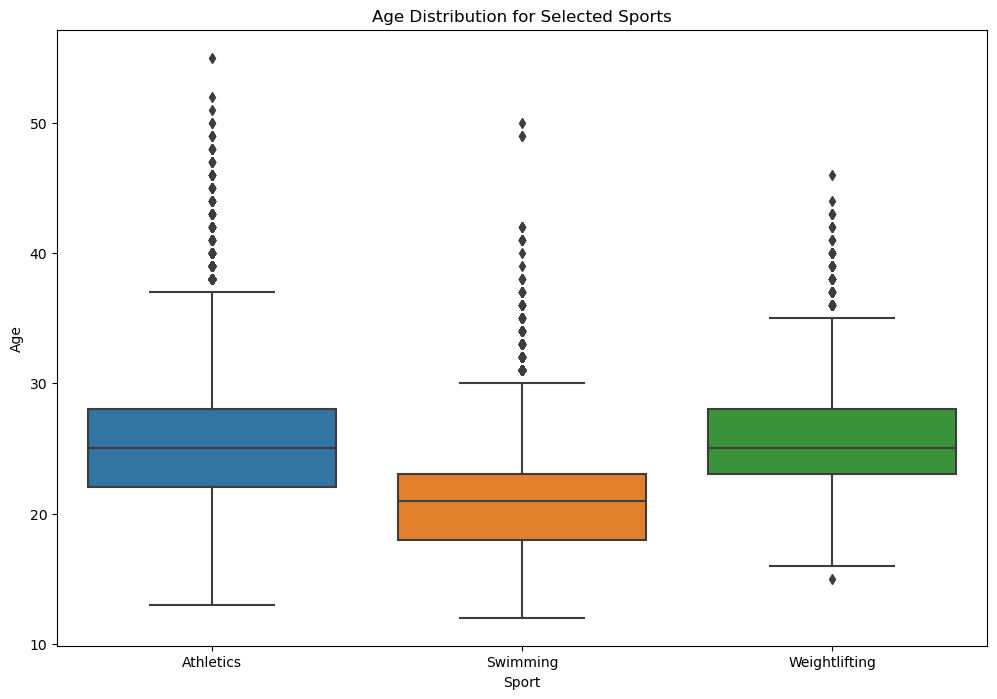

In [10]:
# Select a few sports for comparison
sports_of_interest = ['Athletics', 'Swimming', 'Gymnastics', 'Weightlifting']
filtered_df = merged_df[merged_df['sport'].isin(sports_of_interest)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='sport', y='age_at_event')
plt.title('Age Distribution for Selected Sports')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.show()
